Melakukan perkiraan harga cabai mendekati idul adha

Data diambil dari [bank indonesia](https://www.bi.go.id/hargapangan/TabelHarga/PasarTradisionalKomoditas)

Dengan [link jurnal](https://jurnal.untan.ac.id/index.php/justin/article/viewFile/57395/75676598293)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from copy import copy
from scipy import stats
import numpy as np
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from tensorflow import keras



1. **Pandas (pd)**
   - **Deskripsi**: Pandas adalah pustaka open-source untuk manipulasi dan analisis data yang dibangun di atas Python. Ini menyediakan struktur data yang fleksibel dan kuat seperti DataFrame dan Series.

2. **Plotly Express (px)**
   - **Deskripsi**: Plotly Express adalah modul Plotly yang memungkinkan pembuatan grafik interaktif dengan kode yang lebih ringkas. Ini sangat berguna untuk visualisasi data yang cepat dan mudah.

3. **Matplotlib (plt)**
   - **Deskripsi**: Matplotlib adalah pustaka plotting 2D yang sangat populer di Python. Ini menyediakan kontrol yang sangat rinci untuk membuat berbagai jenis grafik dan visualisasi.

4. **Copy (copy)**
   - **Deskripsi**: Modul copy di Python menyediakan fungsi untuk membuat salinan objek. Ada dua jenis salinan: shallow copy dan deep copy.

5. **SciPy (stats)**
   - **Deskripsi**: SciPy adalah pustaka yang digunakan untuk komputasi ilmiah dan teknis. Submodul `stats` menyediakan berbagai fungsi statistik, distribusi, dan tes statistik.

6. **NumPy (np)**
   - **Deskripsi**: NumPy adalah pustaka fundamental untuk komputasi ilmiah di Python. Ini menyediakan array multidimensi yang efisien dan fungsi matematika untuk operasi pada array.

7. **Plotly Figure Factory (ff)**
   - **Deskripsi**: Plotly Figure Factory adalah modul di Plotly yang menyediakan fungsi untuk membuat plot kompleks seperti scatterplot matrix, violin plots, dan banyak lagi.

8. **Scikit-learn (train_test_split)**
   - **Deskripsi**: Scikit-learn adalah pustaka machine learning yang menyediakan berbagai alat untuk pemodelan dan evaluasi model. Fungsi `train_test_split` membagi dataset menjadi set pelatihan dan pengujian.

9. **TensorFlow Keras (keras)**
   - **Deskripsi**: Keras adalah API tingkat tinggi untuk membangun dan melatih model pembelajaran mesin, yang sekarang merupakan bagian dari TensorFlow. Ini menyediakan antarmuka yang mudah digunakan untuk mendefinisikan dan melatih jaringan saraf.

## INITIALIZE DATASET

In [ ]:
chili_price_df = pd.read_csv('/content/drive/MyDrive/Sem4_AI/cabe2014.csv')
chili_price_df

,No,Komoditas (Rp),05/ 06/ 2014,06/ 06/ 2014,09/ 06/ 2014,10/ 06/ 2014,11/ 06/ 2014,12/ 06/ 2014,13/ 06/ 2014,16/ 06/ 2014,...,23/ 05/ 2024,24/ 05/ 2024,27/ 05/ 2024,28/ 05/ 2024,29/ 05/ 2024,30/ 05/ 2024,31/ 05/ 2024,03/ 06/ 2024,04/ 06/ 2024,05/ 06/ 2024
0,I,Semua Provinsi,-,-,-,-,-,-,-,-,...,"51,850","51,850","51,650","52,250","52,950","52,550","52,450","54,000","54,050","55,100"
1,II,DI Yogyakarta,-,-,-,-,-,-,-,-,...,"47,500","47,500","42,500","43,150","43,750","45,000","46,250","45,000","45,650","45,650"


In [ ]:
chili_price_df_fiks = chili_price_df.copy()

In [ ]:
df = chili_price_df_fiks.drop(index=0)
df

,No,Komoditas (Rp),05/ 06/ 2014,06/ 06/ 2014,09/ 06/ 2014,10/ 06/ 2014,11/ 06/ 2014,12/ 06/ 2014,13/ 06/ 2014,16/ 06/ 2014,...,23/ 05/ 2024,24/ 05/ 2024,27/ 05/ 2024,28/ 05/ 2024,29/ 05/ 2024,30/ 05/ 2024,31/ 05/ 2024,03/ 06/ 2024,04/ 06/ 2024,05/ 06/ 2024
1,II,DI Yogyakarta,-,-,-,-,-,-,-,-,...,"47,500","47,500","42,500","43,150","43,750","45,000","46,250","45,000","45,650","45,650"


In [ ]:
df_selected = df.iloc[:, 2:]
df_selected = df_selected.reset_index(drop=True)
df_selected

,05/ 06/ 2014,06/ 06/ 2014,09/ 06/ 2014,10/ 06/ 2014,11/ 06/ 2014,12/ 06/ 2014,13/ 06/ 2014,16/ 06/ 2014,17/ 06/ 2014,18/ 06/ 2014,...,23/ 05/ 2024,24/ 05/ 2024,27/ 05/ 2024,28/ 05/ 2024,29/ 05/ 2024,30/ 05/ 2024,31/ 05/ 2024,03/ 06/ 2024,04/ 06/ 2024,05/ 06/ 2024
0,-,-,-,-,-,-,-,-,-,-,...,"47,500","47,500","42,500","43,150","43,750","45,000","46,250","45,000","45,650","45,650"


In [ ]:
df_selected.columns = df_selected.columns.str.replace(' ', '')
df_selected

,05/06/2014,06/06/2014,09/06/2014,10/06/2014,11/06/2014,12/06/2014,13/06/2014,16/06/2014,17/06/2014,18/06/2014,...,23/05/2024,24/05/2024,27/05/2024,28/05/2024,29/05/2024,30/05/2024,31/05/2024,03/06/2024,04/06/2024,05/06/2024
0,-,-,-,-,-,-,-,-,-,-,...,"47,500","47,500","42,500","43,150","43,750","45,000","46,250","45,000","45,650","45,650"


In [ ]:
df_transposed = df_selected.T
df_transposed = df_transposed.reset_index()
df_transposed.columns=["Date","Price"]
df_transposed

,Date,Price
0,05/06/2014,-
1,06/06/2014,-
2,09/06/2014,-
3,10/06/2014,-
4,11/06/2014,-
...,...,...
2605,30/05/2024,"45,000"
2606,31/05/2024,"46,250"
2607,03/06/2024,"45,000"
2608,04/06/2024,"45,650"


In [ ]:
chili_price_df = df_transposed.copy()

In [ ]:
count_dash = (chili_price_df['Price'] == "-").sum()
count_dash

948

In [ ]:
chili_price_df = chili_price_df[chili_price_df['Price'] != "-"]
chili_price_df

,Date,Price
872,09/10/2017,"25,000"
873,10/10/2017,"25,650"
874,11/10/2017,"25,150"
875,12/10/2017,"24,500"
876,13/10/2017,"24,000"
...,...,...
2605,30/05/2024,"45,000"
2606,31/05/2024,"46,250"
2607,03/06/2024,"45,000"
2608,04/06/2024,"45,650"


In [ ]:
count_dash = (chili_price_df['Price'] == "-").sum()
count_dash

0

In [ ]:
chili_price_df.dtypes

Date     object
Price    object
dtype: object

In [ ]:
chili_price_df['Price'] = chili_price_df['Price'].str.replace(',', '').astype(float)
chili_price_df['Date'] = pd.to_datetime(chili_price_df['Date'], format='%d/%m/%Y')
chili_price_df

,Date,Price
872,2017-10-09,25000.0
873,2017-10-10,25650.0
874,2017-10-11,25150.0
875,2017-10-12,24500.0
876,2017-10-13,24000.0
...,...,...
2605,2024-05-30,45000.0
2606,2024-05-31,46250.0
2607,2024-06-03,45000.0
2608,2024-06-04,45650.0


In [ ]:
chili_price_df.describe()

,Date,Price
count,1662,1662.000000
mean,2021-02-15 16:45:03.249097728,39197.593261
min,2017-10-09 00:00:00,14000.000000
25%,2019-06-19 06:00:00,29150.000000
50%,2021-02-20 12:00:00,36900.000000
75%,2022-10-30 06:00:00,46250.000000
max,2024-06-05 00:00:00,94400.000000
std,NaN,15587.992364


In [ ]:
# Plot data
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

## DATA VISUALIZATION

In [ ]:
interactive_plot(chili_price_df, 'chili prices')

In [ ]:
training_data = chili_price_df.iloc[:, 1:2].values
training_data

array([[25000.],
       [25650.],
       [25150.],
       ...,
       [45000.],
       [45650.],
       [45650.]])

In [ ]:
# Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)
training_set_scaled

array([[0.13681592],
       [0.1449005 ],
       [0.13868159],
       ...,
       [0.38557214],
       [0.39365672],
       [0.39365672]])

In [ ]:
# Membuat training dan testing data, training data memuat harga hari ini dan sebelumnya
X = []
y = []
for i in range(1, len(chili_price_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
# Convert data >> Array
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
X

array([[0.13681592],
       [0.1449005 ],
       [0.13868159],
       ...,
       [0.4011194 ],
       [0.38557214],
       [0.39365672]])

In [ ]:
# Split the data, 80% training dan 20% testing
split = int(0.8 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

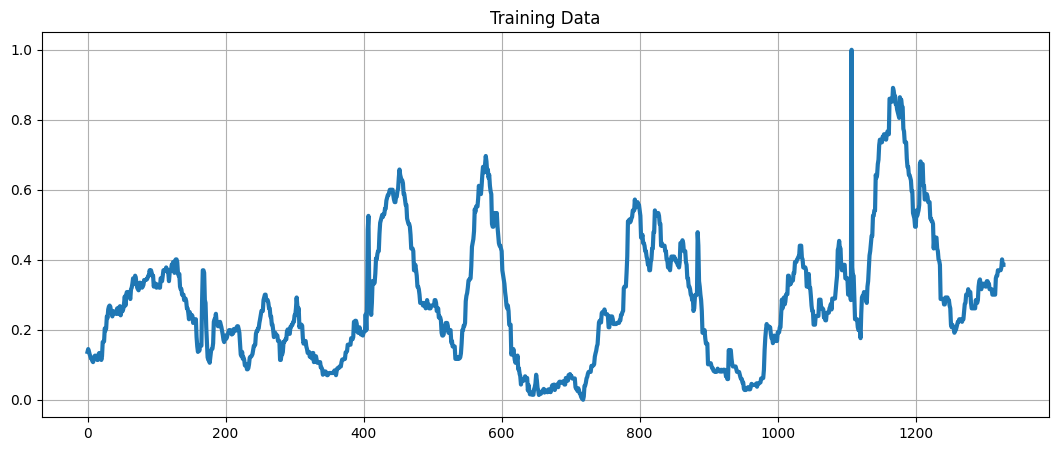

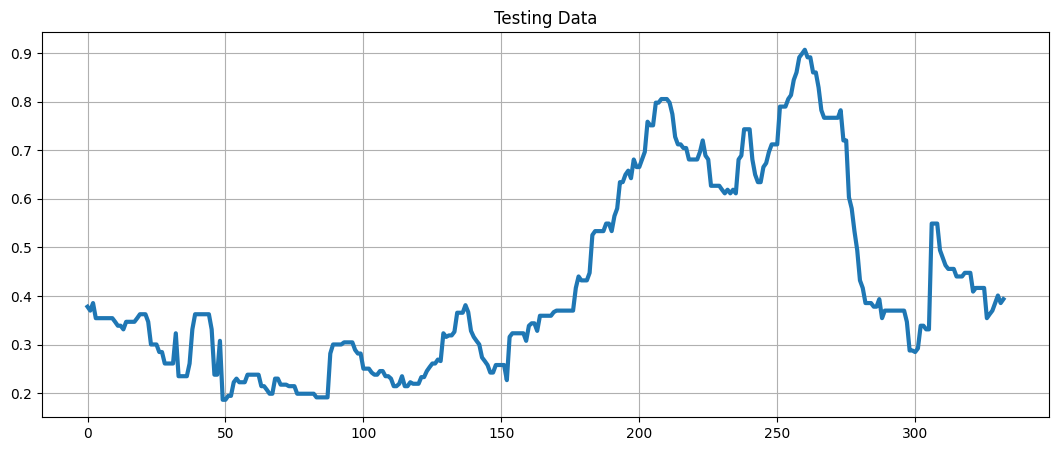

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
# Reshape the 1D arrays to 2D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
X_train.shape, X_test.shape

((1328, 1), (333, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[1]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mae")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 55,
    batch_size = 32,
    validation_split = 0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/55
34/34 [==============================] - 8s 51ms/step - loss: 0.1516 - val_loss: 0.1495 - lr: 0.0010
Epoch 2/55
34/34 [==============================] - 0s 14ms/step - loss: 0.0597 - val_loss: 0.0557 - lr: 0.0010
Epoch 3/55
34/34 [==============================] - 0s 14ms/step - loss: 0.0238 - val_loss: 0.0292 - lr: 0.0010
Epoch 4/55
34/34 [==============================] - 0s 14ms/step - loss: 0.0202 - val_loss: 0.0271 - lr: 0.0010
Epoch 5/55
34/34 [==============================] - 1s 15ms/step - loss: 0.0191 - val_loss: 0.0208 - lr: 0.0010
Epoch 6/55
34/34 [==============================] - 0s 15ms/step - loss: 0.0179 - val_loss: 0.0232 - lr: 0.0010
Epoch 7/55
34/34 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0231 - lr: 0.0010
Epoch 8/55
34/34 [==============================] - 0s 13ms/step - loss: 0.0175 - val_loss: 0.0187 - lr: 0.0010
Epoch 9/55
34/34 [==============================] - 1s 15ms/step - loss: 0.0173 - val_loss: 0.0199 - lr:

In [ ]:
# Make prediction
predicted = model.predict(X)

52/52 [==============================] - 2s 6ms/step


In [ ]:
predicted

array([[0.13334844],
       [0.14158106],
       [0.13524814],
       ...,
       [0.40240467],
       [0.38662413],
       [0.39483142]], dtype=float32)

In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.13334844,
 0.14158106,
 0.13524814,
 0.12701656,
 0.1206856,
 0.11435558,
 0.11435558,
 0.1067609,
 0.10359689,
 0.111190945,
 0.1206856,
 0.12258481,
 0.11308968,
 0.11308968,
 0.10992516,
 0.10992516,
 0.12701656,
 0.1301824,
 0.1206856,
 0.1206856,
 0.10992516,
 0.1206856,
 0.16185105,
 0.16375166,
 0.16375166,
 0.20177189,
 0.19543445,
 0.20177189,
 0.23662865,
 0.23155871,
 0.2569068,
 0.26514372,
 0.26831153,
 0.26514372,
 0.25247124,
 0.24740177,
 0.23662865,
 0.25247124,
 0.24740177,
 0.24613443,
 0.24613443,
 0.24423331,
 0.25247124,
 0.2600749,
 0.24423331,
 0.25247124,
 0.26324293,
 0.2664109,
 0.23979732,
 0.24930286,
 0.2600749,
 0.25247124,
 0.2600749,
 0.27591377,
 0.29491535,
 0.26831153,
 0.29998136,
 0.3075792,
 0.3075792,
 0.3075792,
 0.29364878,
 0.29364878,
 0.2873155,
 0.31580883,
 0.32023945,
 0.33162996,
 0.34744382,
 0.3392216,
 0.33162996,
 0.35503155,
 0.34744382,
 0.33162996,
 0.32023945,
 0.31580883,
 0.31264377,
 0.32340384,
 0.33479333,
 0.32656795,
 0

In [ ]:
df_predicted = chili_price_df[1:][['Date']]
df_predicted

,Date
873,2017-10-10
874,2017-10-11
875,2017-10-12
876,2017-10-13
877,2017-10-16
...,...
2605,2024-05-30
2606,2024-05-31
2607,2024-06-03
2608,2024-06-04


In [ ]:
df_predicted['LSTM Prediction'] = test_predicted

In [ ]:
df_predicted

,Date,LSTM Prediction
873,2017-10-10,0.133348
874,2017-10-11,0.141581
875,2017-10-12,0.135248
876,2017-10-13,0.127017
877,2017-10-16,0.120686
...,...,...
2605,2024-05-30,0.370833
2606,2024-05-31,0.386624
2607,2024-06-03,0.402405
2608,2024-06-04,0.386624


In [ ]:
# Plot the data
price = []
for i in training_set_scaled:
  price.append(i[0])

In [ ]:
df_predicted['Price'] = price[1:]
df_predicted

,Date,LSTM Prediction,Price
873,2017-10-10,0.133348,0.144900
874,2017-10-11,0.141581,0.138682
875,2017-10-12,0.135248,0.130597
876,2017-10-13,0.127017,0.124378
877,2017-10-16,0.120686,0.118159
...,...,...,...
2605,2024-05-30,0.370833,0.385572
2606,2024-05-31,0.386624,0.401119
2607,2024-06-03,0.402405,0.385572
2608,2024-06-04,0.386624,0.393657


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")

In [ ]:
# Calculate MAPE
mask = df_predicted['Price'] != 0
mape = np.mean(np.abs((df_predicted['Price'][mask] - df_predicted['LSTM Prediction'][mask]) / df_predicted['Price'][mask])) * 100
print("MAPE:", mape)

MAPE: 6.359112177958765


In [ ]:
df_predicted


,Date,LSTM Prediction,Price
873,2017-10-10,0.133348,0.144900
874,2017-10-11,0.141581,0.138682
875,2017-10-12,0.135248,0.130597
876,2017-10-13,0.127017,0.124378
877,2017-10-16,0.120686,0.118159
...,...,...,...
2605,2024-05-30,0.370833,0.385572
2606,2024-05-31,0.386624,0.401119
2607,2024-06-03,0.402405,0.385572
2608,2024-06-04,0.386624,0.393657


In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean((df_predicted['Price'][mask] - df_predicted['LSTM Prediction'][mask]) ** 2))
print("RMSE:", rmse)

RMSE: 0.03244919065546478


In [ ]:
last_10_days = X[-1]
last_10_days

array([0.39365672])

In [ ]:
# Ambil data terbaru untuk memulai prediksi
last_data = X_test[-1]

# Buat variabel untuk menyimpan hasil prediksi
predicted_prices = []

# Lakukan prediksi untuk 5 hari ke depan
for _ in range(5):
    # Prediksi harga untuk hari berikutnya
    next_price = model.predict(last_data.reshape(1, last_data.shape[0]))[0, 0]
    predicted_prices.append(next_price)

    # Update data untuk prediksi berikutnya
    last_data = np.append(last_data[1:], next_price)

# Cetak hasil prediksi
print("Predicted Prices for the Next 5 Days:")
print(predicted_prices)

1/1 [==============================] - 0s 34ms/step
Predicted Prices for the Next 5 Days:
[0.39483142, 0.39602363, 0.39723366, 0.39846164, 0.39970785]


In [ ]:
predicted_prices_normalized = np.array(predicted_prices).reshape(-1, 1)

predicted_prices_actual = sc.inverse_transform(predicted_prices_normalized)

print("Predicted Prices for the Next 5 Days (Actual):")
print(predicted_prices_actual)

Predicted Prices for the Next 5 Days (Actual):
[[45744.445]
 [45840.3  ]
 [45937.586]
 [46036.316]
 [46136.51 ]]
